## Rules Task Knowledge Graph

/tmp/ipython-input-1-540184692.py:80: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


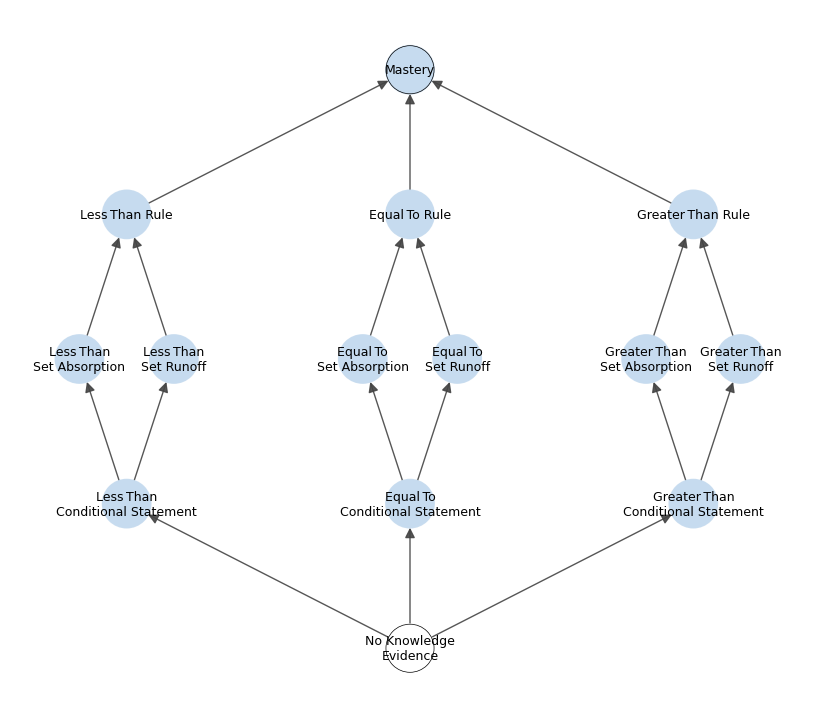

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

mastery_node = "Mastery"

conditions = ["Less Than", "Equal To", "Greater Than"]

cond_stmt_nodes = [f"{cond}\nConditional Statement" for cond in conditions]
set_abs_nodes = [f"{cond}\nSet Absorption" for cond in conditions]
set_run_nodes = [f"{cond}\nSet Runoff" for cond in conditions]
rule_nodes = [f"{cond} Rule" for cond in conditions]
null_node = "No Knowledge\nEvidence"

edges = []

for node in cond_stmt_nodes:
    edges.append((null_node, node))

for cond, stmt in zip(conditions, cond_stmt_nodes):
    edges.append((stmt, f"{cond}\nSet Absorption"))
    edges.append((stmt, f"{cond}\nSet Runoff"))

for cond in conditions:
    edges.append((f"{cond}\nSet Absorption", f"{cond} Rule"))
    edges.append((f"{cond}\nSet Runoff", f"{cond} Rule"))

for rule in rule_nodes:
    edges.append((rule, mastery_node))

G = nx.DiGraph()
G.add_node(mastery_node)
G.add_node(null_node)
for node_list in [cond_stmt_nodes, set_abs_nodes, set_run_nodes, rule_nodes]:
    G.add_nodes_from(node_list)
G.add_edges_from(edges)

pos = {
    null_node: (0, 0),
    "Less Than\nConditional Statement": (-3, 1),
    "Equal To\nConditional Statement": (0, 1),
    "Greater Than\nConditional Statement": (3, 1),
    "Less Than\nSet Absorption": (-3.5, 2),
    "Less Than\nSet Runoff": (-2.5, 2),
    "Equal To\nSet Absorption": (-0.5, 2),
    "Equal To\nSet Runoff": (0.5, 2),
    "Greater Than\nSet Absorption": (2.5, 2),
    "Greater Than\nSet Runoff": (3.5, 2),
    "Less Than Rule": (-3, 3),
    "Equal To Rule": (0, 3),
    "Greater Than Rule": (3, 3),
    mastery_node: (0, 4),
}

plt.figure(figsize=(8, 7))

node_color_map = ["#ffffff" if n == null_node else "#c6dbef" for n in G.nodes()]
nx.draw(
    G,
    pos,
    node_size=1200,
    node_color=node_color_map,
    edge_color="#444444",
    linewidths=1.2,
    alpha=0.9,
    arrows=True,
    arrowsize=15,
)

border_color_map = ["black" if n in {null_node, mastery_node} else "#00000000" for n in G.nodes()]
nx.draw_networkx_nodes(
    G, pos,
    node_size=1200,
    node_color=node_color_map,
    edgecolors=border_color_map,
    linewidths=0.5
)

nx.draw_networkx_labels(G, pos, font_size=9)
plt.axis("off")
plt.tight_layout()